## 1. What is Radius Neighbors Regression?

The **Radius Neighbors Regressor** is similar to the K-Nearest Neighbors (KNN) regressor, but instead of looking at the *k* nearest neighbors, it looks at all neighbors **within a fixed radius**.

### Key Idea:
- Given a query point, the algorithm finds all training samples within a specified radius.
- The prediction is the **mean** (or weighted mean) of the target values of those neighbors.

### Difference from KNN Regressor:
- **KNN**: fixed number of neighbors (k)  
- **Radius Neighbors**: variable number of neighbors (depends on how many fall within the radius)

### Pros:
- More flexible in capturing local structures.  
- Useful when data density varies.  

### Cons:
- Choice of radius is crucial.  
- If radius is too small, some points may have no neighbors.  
- If radius is too large, predictions may lose locality.

In [20]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target
print("Dataset shape:", X.shape)
print("Target shape:", y.shape)


Dataset shape: (20640, 8)
Target shape: (20640,)


In [21]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 3. Training Radius Neighbors Regressor

We now train a **RadiusNeighborsRegressor**.

Important hyperparameters:
- `radius`: Radius of neighborhood.
- `weights`: How to weight neighbors (`uniform` or `distance`).
- `algorithm`: Search algorithm (`auto`, `ball_tree`, `kd_tree`, `brute`).
- `leaf_size`: Affects tree-based algorithms' speed.

We will start with a radius of `3.0`.


In [31]:
# Train model
regressor = RadiusNeighborsRegressor(radius=10.0, weights='distance')
regressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred = regressor.predict(X_test_scaled)
if np.any(np.isnan(y_pred)):
    mean_value = np.nanmean(y_pred)  # mean of non-NaN predictions
    y_pred = np.nan_to_num(y_pred, nan=mean_value)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 1.16
R² Score: 0.12


/Users/A200027845/AI/machine-learning/venv/lib/python3.12/site-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


## 4. Model Evaluation

We evaluate the model using:
- **Mean Squared Error (MSE)**
- **R² Score** (explains variance)

We also visualize the predicted vs actual house prices.


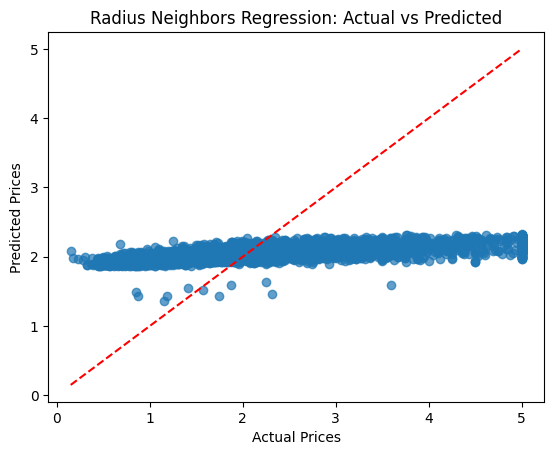

In [32]:
# Visualization of predictions
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Radius Neighbors Regression: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

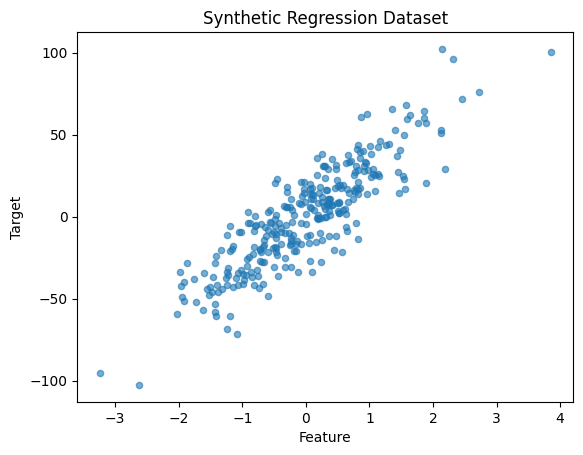

In [2]:
X, y = make_regression(n_samples=300, n_features=1, noise=15, random_state=42)

# Visualize dataset
plt.scatter(X, y, s=20, alpha=0.6)
plt.title("Synthetic Regression Dataset")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

## 5. Hyperparameter Sensitivity

The choice of `radius` is very important:
- Small radius → fewer neighbors, may underfit.
- Large radius → too many neighbors, may overfit.

We will test different radii and compare R² scores.

/Users/A200027845/AI/machine-learning/venv/lib/python3.12/site-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/Users/A200027845/AI/machine-learning/venv/lib/python3.12/site-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/Users/A200027845/AI/machine-learning/venv/lib/python3.12/site-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/Users/A200027845/AI/machine-learning/venv/lib/python3.12/site-packages/sklearn/neighbors/_regression.py:508: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/Users/A200027845/AI/machine-learning/venv/lib/pytho

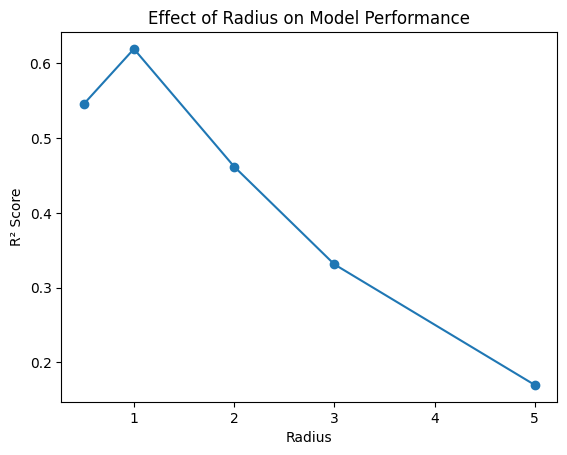

In [38]:
radii = [0.5, 1.0, 2.0, 3.0, 5.0]
scores = []

for r in radii:
    model = RadiusNeighborsRegressor(radius=r, weights='distance')
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Replace NaN predictions with training target mean
    if np.any(np.isnan(y_pred)):
        mean_value = np.mean(y_train)
        y_pred = np.nan_to_num(y_pred, nan=mean_value)

    scores.append(r2_score(y_test, y_pred))

plt.plot(radii, scores, marker='o')
plt.xlabel("Radius")
plt.ylabel("R² Score")
plt.title("Effect of Radius on Model Performance")
plt.show()

# Conclusion
- Radius Neighbors Regression is a **flexible, distance-based regression algorithm**.
- It differs from KNN regression by using a **fixed radius** instead of a fixed number of neighbors.
- The choice of radius drastically affects predictions:
  - Too small → sparse neighbors, unstable predictions.
  - Too large → oversmoothing, loss of local detail.
- Weighting by distance generally improves results.

**When to use it?**
- When data has **local patterns** and you want flexibility.
- When choosing k (in KNN) is hard, but a meaningful distance radius can be estimated.